In [8]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
from sklearn.model_selection import train_test_split
import requests
import os
import concurrent.futures
from PIL import Image


In [9]:
# Creates the directories that will receive the images

def check_directories():
    os.makedirs('images/dogs', exist_ok=True)
    os.makedirs('images/ducks', exist_ok=True)
    os.makedirs('images/foxes', exist_ok=True)

check_directories()  

In [10]:
def get_images(api_url):
    r = requests.get(api_url)
    data = r.json()

    if(api_url == 'https://randomfox.ca/floof/'):
        second_key = list(data.keys())[0]
    else:
        second_key = list(data.keys())[1]
    
    return data[second_key]



In [11]:

def download_images(i,animal):

    try:
        while True:
            if(animal == 'dog'):
                url = get_images('https://random.dog/woof.json')
            elif(animal == 'foxe'):
                url = get_images('https://randomfox.ca/floof/')
            elif(animal == 'duck'):
                url = get_images('https://random-d.uk/api/random?type=jpg')
            
         
            img_data = requests.get(url)
           
            if url.endswith(('.mp4', '.webm', 'gif')):
                print(f"[{i}] Video/Gif detected , trying again...")
                continue 

            file_path = f'images/{animal}s/{animal}_{i}.jpg'

            with open(file_path, 'wb') as f:
                f.write(img_data.content)

            print(f"Successfully downloaded: {file_path}")
            break
    except Exception as e:
        print(f"error: {e}")
        raise


total_images = 1000

check_directories()

animals = ['foxe','duck','dog']



with concurrent.futures.ThreadPoolExecutor(max_workers=100) as executor:
    for animal in animals:
        futures = [executor.submit(download_images, i, animal) for i in range(1, total_images + 1)]
        concurrent.futures.wait(futures)



Successfully downloaded: images/foxes/foxe_42.jpg
Successfully downloaded: images/foxes/foxe_72.jpg
Successfully downloaded: images/foxes/foxe_83.jpg
Successfully downloaded: images/foxes/foxe_10.jpg
Successfully downloaded: images/foxes/foxe_47.jpg
Successfully downloaded: images/foxes/foxe_19.jpg
Successfully downloaded: images/foxes/foxe_3.jpg
Successfully downloaded: images/foxes/foxe_61.jpg
Successfully downloaded: images/foxes/foxe_92.jpg
Successfully downloaded: images/foxes/foxe_70.jpg
Successfully downloaded: images/foxes/foxe_63.jpg
Successfully downloaded: images/foxes/foxe_94.jpg
Successfully downloaded: images/foxes/foxe_15.jpg
Successfully downloaded: images/foxes/foxe_100.jpg
Successfully downloaded: images/foxes/foxe_80.jpg
Successfully downloaded: images/foxes/foxe_6.jpg
Successfully downloaded: images/foxes/foxe_28.jpg
Successfully downloaded: images/foxes/foxe_8.jpg
Successfully downloaded: images/foxes/foxe_23.jpg
Successfully downloaded: images/foxes/foxe_78.jpg
Su

In [12]:

x_dict = {
    'foxe': [],
    'duck': [],
    'dog': []
}

y_dict = {
    'foxe': [],
    'duck': [],
    'dog': []
}



In [13]:
# for each animal class, converts each image to RGB format and adds the RGB array into x_dict
# for each iteration, adds the label in y_dict

for animal in animals:

  for i in range(1,1001):
    

      file_path = f'images/{animal}s/{animal}_{i}.jpg'      
      image = Image.open(file_path).convert('RGB')
      # All the images will be 64px x 64px
      image = image.resize((64,64))
      image_array = np.array(image)
      x_dict[animal].append(image_array)
      y_dict[animal].append(f'{animal}')



In [14]:
# Combines all the dictionaries values into X and y 

X = x_dict['foxe'] + x_dict['duck'] + x_dict['dog']
y = y_dict['foxe'] + y_dict['duck'] + y_dict['dog']


In [15]:


result = 0

for images in X:
    if images.shape != (64,64,3):
        images = images[:,:,3]
        result += 1



In [17]:
from sklearn.linear_model import LogisticRegression

X = np.array(X)


X = X.reshape((X.shape[0], -1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=42)

# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

In [18]:
y_pred = logreg.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy in test set: {accuracy:.2f}')

Accuracy in test set: 0.91


In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         dog       0.93      0.79      0.85       186
        duck       0.86      0.92      0.89       197
        foxe       0.94      1.00      0.97       217

    accuracy                           0.91       600
   macro avg       0.91      0.90      0.91       600
weighted avg       0.91      0.91      0.91       600



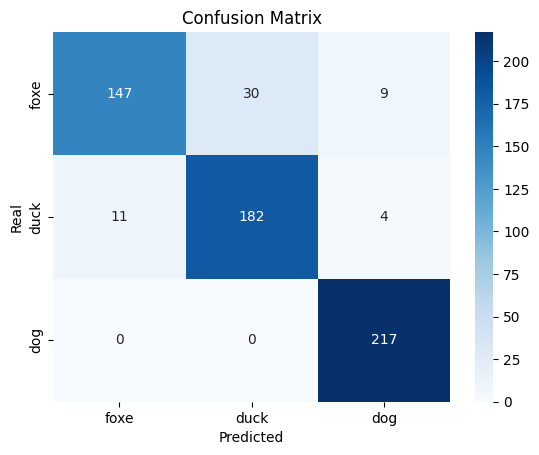

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=animals, yticklabels=animals)
plt.xlabel("Predicted")
plt.ylabel("Real")
plt.title("Confusion Matrix")
plt.show()